# Suicide Rates Overview 1985 to 2016
## by Aisulu Omar


## Content

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## References

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

## Inspiration

Suicide Prevention.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('master.csv')

In [4]:
df_clean = data.copy()

### Assesing data 

First step will be assesing data to see if it needs any wrangling. 

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Define

#### Removing one column in order to clean data 

In [5]:
df_clean.drop(['HDI for year'],axis=1,inplace=True)

In [6]:
nRow, nCol = df_clean.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 27820 rows and 11 columns


In [7]:
df_clean['country'].nunique()

101

In [8]:
print('Min : ',df_clean.year.min())
print('Max : ',df_clean.year.max())

Min :  1985
Max :  2016


In [9]:
df_clean.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Test

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


### Data structure:
-  There are 27820 rows and 11 columns. 101 countries. Data was given from 1985 to 2016 years. 

### Main feautures of my interest: 

-  Dynamic of change of number of suicides from 1985 - 2016.

- Distribution of suicides between different generation. 

- Correlation of economic situation of the country and number of suicides per 100k population.  

- Correlation between country-year and number of suicides per 100k population. 

### Univariate exploration 

#### Distribution of GDP per capita

In [11]:
df_clean['gdp_per_capita ($)'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita ($), dtype: float64

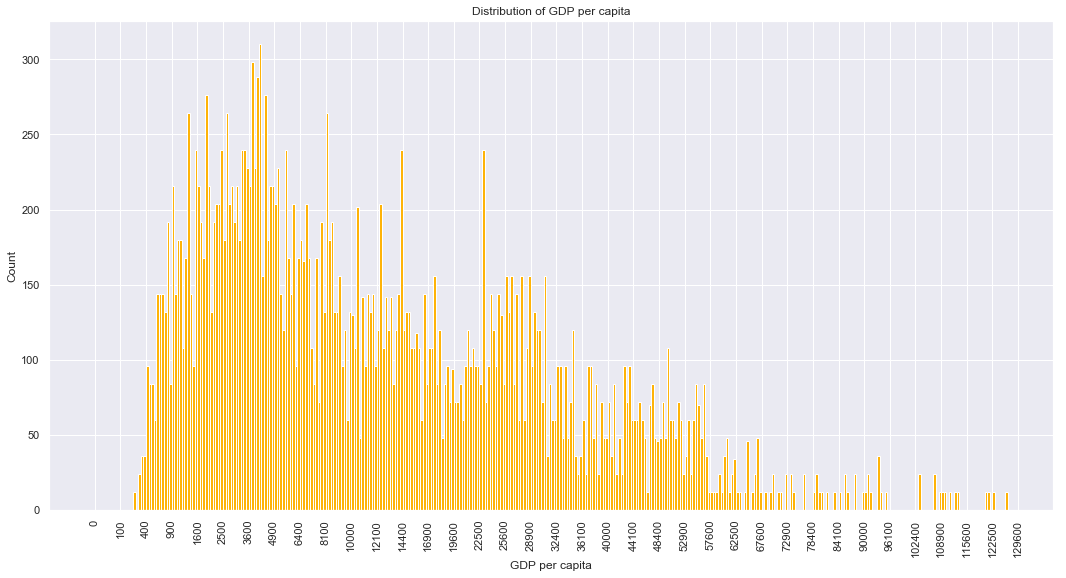

In [21]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

plt.figure(figsize=(18,9))


def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(df_clean['gdp_per_capita ($)'].max())+1, 1)
plt.hist(df_clean['gdp_per_capita ($)'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(df_clean['gdp_per_capita ($)'].max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int),rotation='vertical')
plt.title('Distribution of GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Count');



#### Summary

- This plots shows how unequal the world is, one country has GDP per capita equals to 251, and the other one's GDP is equal to 126352. 

I plotted distribution on a square-root transoformation to make sure the range of GDP per capita in different counries is clear and outliers are visible. The distribution is right skewed and the mean is around 16866. 

## Bivariate Exploration

Correlation between GDP per capita and number of suicides per 100k population. I created a scatterplot to see the distibution of data and correlation between two variables. 

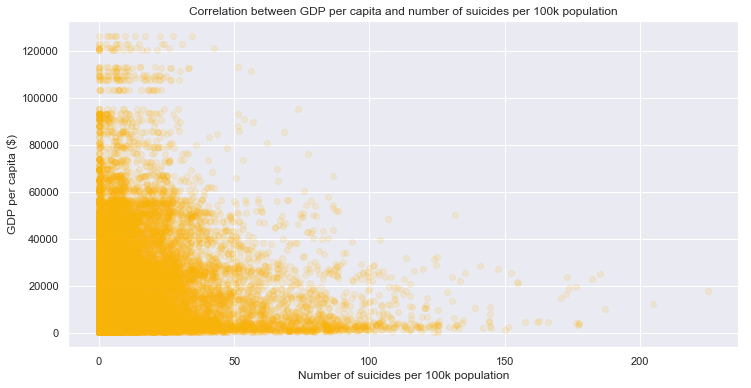

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(data=df_clean,x='suicides/100k pop',y='gdp_per_capita ($)',alpha=1/8)
plt.title('Correlation between GDP per capita and number of suicides per 100k population')
plt.xlabel('Number of suicides per 100k population')
plt.ylabel('GDP per capita ($)');

#### Findings:

- Most of the data falls in a large blob between 0 to 60000 (GDP per capita) on y axis, and between 0 to 50 (Number of suicides per 100k population) on x axis. 
- There is slight trend showing that countires with lower GDP have higher numbers of suicides. However, there are a lot of outliers. 

## The amount of suicides of different generations

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


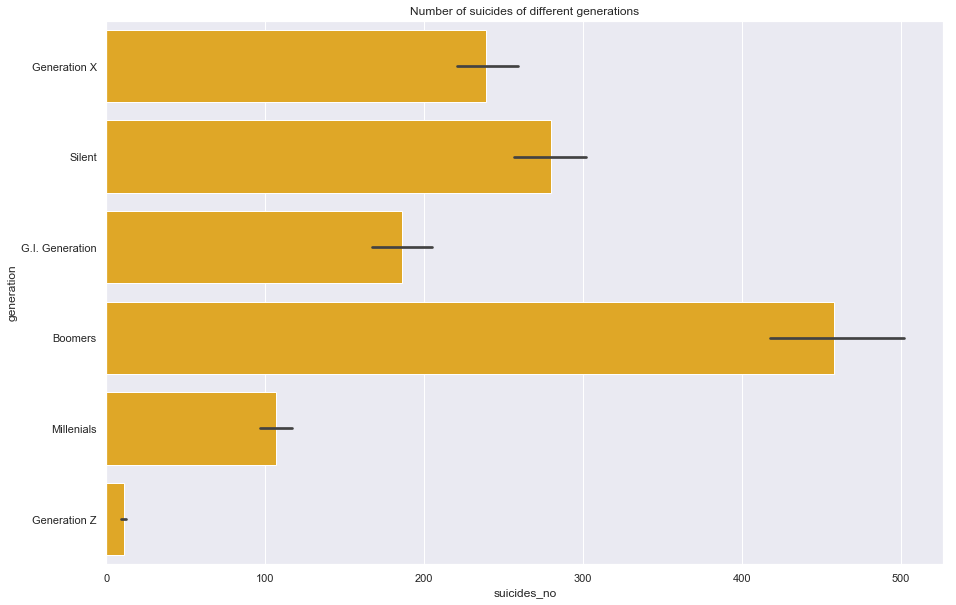

In [53]:
base_color = sns.color_palette()[0]
sns.barplot(data = df_clean,x='suicides_no',y='generation',color=base_color);
plt.title('Number of suicides of different generations');

#### Findings:
Seaborn's barplot function makes short work of this exercise. I've made a horizontal bar chart.

- Boomers has the highest number of suicides
- Generation Z has the lowest number of suicides

### 10 countires with highest suicide rate per 100k population

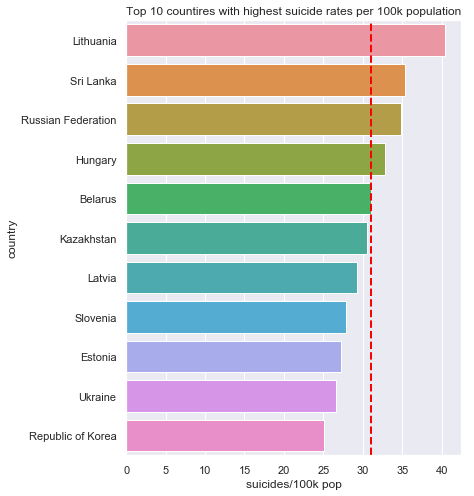

In [54]:
byCountry = df_clean.groupby('country').mean().sort_values('suicides/100k pop', ascending=False).reset_index()[:11]
plt.figure(figsize=(6,8))
sns.barplot(x='suicides/100k pop',y='country',data=byCountry)
plt.axvline(x= byCountry['suicides/100k pop'].mean(),color='red',ls='--',linewidth=2)
plt.title('Top 10 countires with highest suicide rates per 100k population');

#### Findings:
- I am surprised that country of my origin (Kazakhstan) is on the 6th place.
- Luthania has the highest suicide rate per 100k population.
- 7 out of 10 countires in this list were part of USSR.

### 10 countires with the lowest rate of suicides per 100k popilation

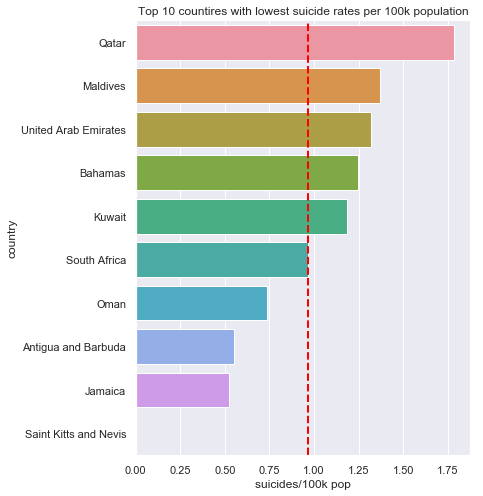

In [55]:
byCountry = df_clean.groupby('country').mean().sort_values('suicides/100k pop', ascending=False).reset_index()[-11:-1]
plt.figure(figsize=(6,8))
sns.barplot(x='suicides/100k pop',y='country',data=byCountry)
plt.axvline(x= byCountry['suicides/100k pop'].mean(),color='red',ls='--',linewidth=2)
plt.title('Top 10 countires with lowest suicide rates per 100k population');

#### Findings:
- All above 10 countires with lowest suicide rate has the tropical climate. 

## Multivariate Exploration

I created seaborn's line plot to see the growth by year of number of suicides between different age groups.

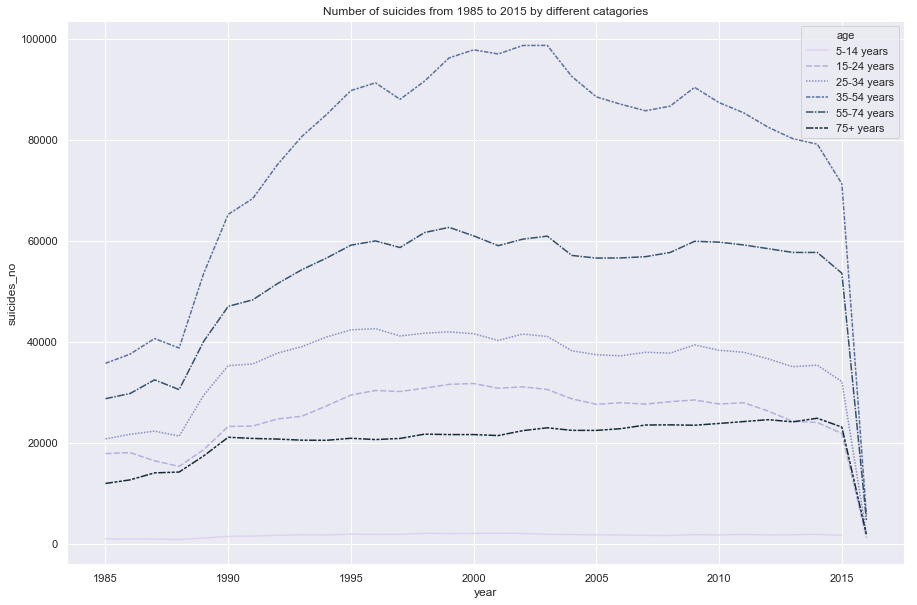

In [22]:
from matplotlib.colors import LogNorm

df_n = df_clean.groupby(['year','age']).suicides_no.sum().reset_index()
df_n['age'] = df_n.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df_n,hue_norm=LogNorm(),palette='ch:2.5,.25',sort=False)
plt.title('Number of suicides from 1985 to 2015 by different catagories');

#### Fingings: 

- The age group between 35-54 years has the highest number of suicides. 
- Highest spike of suicides was in a year 2000, then slowly decreased by 2015.
- The age group between 5-14 has the lowest number of suicides. 


## The growth of suicides between different age groups


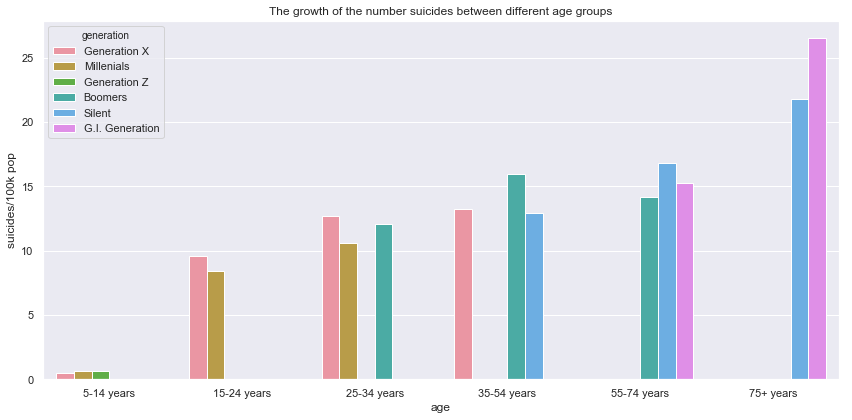

In [24]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

plt.figure(figsize=(12,6))

byAgeGen = df_clean.groupby(['age','generation']).mean().sort_values('suicides/100k pop',ascending=True).reset_index()
sns.barplot(x='age',y='suicides/100k pop',data=byAgeGen, hue='generation')
plt.title('The growth of the number suicides between different age groups')
plt.tight_layout();

#### Findings:
- Number of suicides per 100k population is increasing with the age.
- G.I. and Silent Generation have the highest numbers of suicides in most age categories.
